In [3]:
# Loading essential libraries
import numpy as np
import pandas as pd

In [4]:
# Loading the dataset
df = pd.read_csv('kaggle_fake_train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [7]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [8]:
df.title[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [9]:
# df.text[0]

In [10]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

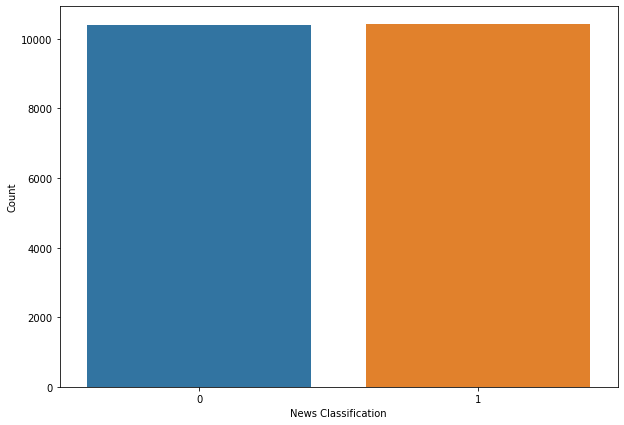

In [11]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# Data Cleaning and Preprocessing

In [12]:
df.shape

(20800, 4)

In [13]:
df.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [14]:
news = df.drop(columns ='author')

In [15]:
news.dropna(inplace = True)

In [16]:
news.shape

(20203, 3)

In [17]:
news.isna().sum()

title    0
text     0
label    0
dtype: int64

In [18]:
news.reset_index(inplace=True)

In [19]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [20]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):
    # Cleaning special character from the news-title
    title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

    # Converting the entire news-title to lower case
    title = title.lower()

    # Tokenizing the news-title by words
    words = title.split()

    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming the words
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    title = ' '.join(words)

    # Building a corpus of news-title
    corpus.append(title)

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [22]:
X.shape

(20203, 5000)

In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# Extracting dependent variable from the dataset
y = news['label']

# Model Building

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Multinomial Naive Bayes

In [26]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [28]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 90.74%
Precision score is: 88.82
Recall score is: 92.07


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [30]:
nb_cm

array([[1903,  222],
       [ 152, 1764]], dtype=int64)

# Hyperparameter tuning for Naive Bayes Classifier

In [31]:
param_grid = {'alpha' : [0.1,0.2,0.3,0.4,0.01,0.001]}

In [111]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5,  verbose=3)

#finding the best parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... alpha=0.1, score=0.900, total=   2.4s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ........................... alpha=0.1, score=0.907, total=   2.1s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] ........................... alpha=0.1, score=0.894, total=   2.1s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.903, total=   2.1s
[CV] alpha=0.1 .......................................................
[CV] ........................... alpha=0.1, score=0.903, total=   2.2s
[CV] alpha=0.2 .......................................................
[CV] ........................... alpha=0.2, score=0.900, total=   2.2s
[CV] alpha=0.2 .......................................................
[CV] ........................... alpha=0.2, score=0.905, total=   2.1s
[CV] alpha=0.2 .......................................................
[CV] ........................... alpha=0.2, score=0.894, total=   2.0s
[CV] alpha=0.2 .......................................................
[CV] ........................... alpha=0.2, score=0.904, total=   2.1s
[CV] alpha=0.2 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
alpha = grid.best_params_['alpha']
alpha

NameError: name 'grid' is not defined

In [40]:
MNB = MultinomialNB(alpha = 0.2)
# training the mew model
MNB.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [41]:
temp_y_pred = MNB.predict(X_test)

In [42]:
score = accuracy_score(y_test, temp_y_pred)
score

0.9076961148230636

In [43]:
MNB.coef_[0]

array([ -9.17128094,  -9.0217492 , -10.20737287, ..., -10.20737287,
        -9.0217492 ,  -9.5607457 ])

In [48]:
### Most real News
sorted(zip(MNB.coef_[0], cv.get_feature_names()), reverse=True)[:20]

[(-3.9190075080929674, 'trump'),
 (-4.242158964591221, 'hillari'),
 (-4.332442136974342, 'clinton'),
 (-4.803058824377626, 'elect'),
 (-5.134474366429681, 'us'),
 (-5.1373258083388915, 'new'),
 (-5.2947179820903205, 'video'),
 (-5.314975258178147, 'war'),
 (-5.363901857302426, 'comment'),
 (-5.367489948701301, 'news'),
 (-5.378332122131455, 'fbi'),
 (-5.381972461062429, 'hillari clinton'),
 (-5.3966678026645445, 'russia'),
 (-5.453782676720008, 'email'),
 (-5.481595355420136, 'vote'),
 (-5.526926561067072, 'america'),
 (-5.565607790762668, 'obama'),
 (-5.574410664508623, 'world'),
 (-5.610418154791673, 'donald'),
 (-5.666983656607783, 'donald trump')]

In [49]:
### Most false News
sorted(zip(MNB.coef_[0], cv.get_feature_names()), reverse=False)[:20]

[(-12.605268140624743, 'abroad'),
 (-12.605268140624743, 'abus new'),
 (-12.605268140624743, 'abus new york'),
 (-12.605268140624743, 'act new'),
 (-12.605268140624743, 'act new york'),
 (-12.605268140624743, 'advic'),
 (-12.605268140624743, 'advis new'),
 (-12.605268140624743, 'advis new york'),
 (-12.605268140624743, 'age new'),
 (-12.605268140624743, 'age new york'),
 (-12.605268140624743, 'agenda breitbart'),
 (-12.605268140624743, 'ahead trump'),
 (-12.605268140624743, 'airlin'),
 (-12.605268140624743, 'aleppo new'),
 (-12.605268140624743, 'aleppo new york'),
 (-12.605268140624743, 'ali'),
 (-12.605268140624743, 'america breitbart'),
 (-12.605268140624743, 'america new'),
 (-12.605268140624743, 'america new york'),
 (-12.605268140624743, 'american new')]

# Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
LR_Classifier = LogisticRegression(random_state=0)
LR_Classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
# Predicting the Test set results
LR_y_pred = LR_Classifier.predict(X_test)

In [122]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, LR_y_pred)
score2 = precision_score(y_test, LR_y_pred)
score3 = recall_score(y_test, LR_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 93.94%
Precision score is: 90.86
Recall score is: 96.97


In [123]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_CM = confusion_matrix(y_test, LR_y_pred)
LR_CM

array([[1938,  187],
       [  58, 1858]], dtype=int64)

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Hyperparameter tuning for Logistic Regression

In [124]:
param_grid_LG = {'C': [1, 5, 10, 15, 20]}

In [125]:
# Creating an object of the Grid Search class
grid = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid_LG, verbose=3, cv=5)
# finding the best parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.937, total=   4.9s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ................................. C=1, score=0.938, total=   4.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s


[CV] ................................. C=1, score=0.928, total=   4.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.938, total=   4.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.937, total=   4.5s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.935, total=   6.1s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.934, total=   6.4s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.930, total=   6.4s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.939, total=   6.5s
[CV] C=5 .............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................. C=5, score=0.934, total=   6.4s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.933, total=   6.6s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.932, total=   6.3s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.928, total=   6.3s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.938, total=   6.2s
[CV] C=10 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.933, total=   6.3s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.931, total=   6.1s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.932, total=   6.0s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.928, total=   6.0s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.937, total=   6.2s
[CV] C=15 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=15, score=0.933, total=   6.0s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.929, total=   6.1s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.930, total=   6.0s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.930, total=   6.1s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.935, total=   6.0s
[CV] C=20 ............................................................


C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=20, score=0.931, total=   6.0s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 15, 20]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [126]:
alpha = grid.best_params_['C']
alpha

1

In [127]:
LR = LogisticRegression(C=1, random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
temp_y_pred = LR.predict(X_test)

In [130]:
score = accuracy_score(y_test, temp_y_pred)
score

0.9393714427122

In [2]:
LR.coef_[0]

NameError: name 'LR' is not defined

In [141]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return LR.predict(temp)

In [142]:
# Loading the dataset
df_test = pd.read_csv('kaggle_fake_test.csv')

In [143]:
df = df_test['title']

In [144]:
# For generating random integer
from random import randint

In [145]:
# Predicting values
row = randint(0,df.shape[0]-1)
print(row)
sample_news = df[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

2350
News: Invasion From Mexico Steps Up
Prediction: This is a FAKE news!
